In [1]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [2]:
import dask.dataframe as dd
from dask.distributed import Client

In [3]:
client = Client(n_workers=12, memory_limit='16GB')

In [4]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 12
Total threads: 12,Total memory: 178.81 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:64284,Workers: 12
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 178.81 GiB
Comm: tcp://127.0.0.1:64342,Total threads: 1
Dashboard: http://127.0.0.1:64358/status,Memory: 14.90 GiB
Nanny: tcp://127.0.0.1:64287,


In [5]:
df = dd.read_csv(r'D:\00 Datasets\CICAPT-IIoT Dataset\Network_Traffic\Phase 1\phase1_NetworkData.csv', blocksize = '80MB')
df

,ts,flow_duration,Header_Length,Source IP,Destination IP,Source Port,Destination Port,Protocol Type,Protocol_name,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,urg_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,max_duration,min_duration,sum_duration,average_duration,std_duration,CoAP,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IGMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,MAC,Magnitue,Radius,Covariance,Variance,Weight,DS status,Fragments,Sequence number,Protocol Version,flow_idle_time,flow_active_time,label,subLabel,subLabelCat
npartitions=68,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,int64,string,string,int64,int64,int64,string,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,float64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,int64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
# Compute the number of rows
num_rows = df.shape[0].compute()
# Print the number of rows
print("Number of rows:", num_rows)

# Compute the number of columns
num_columns = len(df.columns)

# Print the number of columns
print("Number of columns:", num_columns)

In [ ]:
# To print the column names
print(df.columns)

In [ ]:
df.head()  # conda install -c conda-forge msgpack-python==1.0.5

In [ ]:
df.isna().sum()

In [ ]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()

print("Columns with non-numeric values:")
print(non_numeric_columns)

In [ ]:
# List of columns to drop
columns_to_drop = ['Source IP', 'Destination IP', 'Protocol_name']

# Drop the columns and assign the result to df_dropped
df_dropped = df.drop(columns_to_drop, axis=1)

# To see the result, you can compute a small portion of the dataframe (e.g., first few rows)
df_dropped.head()  # This will compute and show the first few rows


In [ ]:
import dask.dataframe as dd

# Assuming df is your original Dask DataFrame

# List of non-numeric columns to check and drop
non_numeric_cols = ['Source IP', 'Destination IP', 'Protocol_name', 'label', 'subLabel', 'subLabelCat']

# Step 1: Check the number of unique values in non-numeric columns
for col in non_numeric_cols:
    unique_values = df[col].nunique().compute()  # Compute to get the actual number of unique values
    print(f"Column '{col}' has {unique_values} unique values.")

# Step 2: Drop the specified non-numeric columns and create a new DataFrame
df_dropped = df.drop(columns = non_numeric_cols)

# Step 3: Save the new DataFrame as a CSV file
output_csv = "df_dropped.csv"
df_dropped.to_csv(output_csv, single_file=True, index=False)

print(f"New DataFrame saved as '{output_csv}'")


In [27]:
client.close()

In [6]:
df_dropped = dd.read_csv(r'df_dropped.csv', blocksize = '80MB')
df_dropped

,ts,flow_duration,Header_Length,Source Port,Destination Port,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,urg_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,max_duration,min_duration,sum_duration,average_duration,std_duration,CoAP,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IGMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,MAC,Magnitue,Radius,Covariance,Variance,Weight,DS status,Fragments,Sequence number,Protocol Version,flow_idle_time,flow_active_time
npartitions=62,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,float64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [7]:
# Remove leading and trailing spaces from column names
df_dropped.columns = df_dropped.columns.str.strip()  

In [8]:
df_dropped.head()

,ts,flow_duration,Header_Length,Source Port,Destination Port,Protocol Type,Duration,Rate,Srate,Drate,...,Radius,Covariance,Variance,Weight,DS status,Fragments,Sequence number,Protocol Version,flow_idle_time,flow_active_time
0,1.701426e+09,0.000000,66,41750,502,6,64,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1,0,0,0,0,1.701426e+09,0.000000
1,1.701426e+09,0.002112,132,41750,502,6,64,946.902359,946.902359,0.0,...,0.0,0.0,0.0,4,0,0,0,0,2.112150e-03,0.002112
2,1.701426e+09,0.002328,198,41750,502,6,64,1288.572657,1288.572657,0.0,...,0.0,0.0,0.0,9,0,0,0,0,2.160072e-04,0.002328
3,1.701426e+09,0.004329,264,41750,502,6,64,923.957264,923.957264,0.0,...,0.0,0.0,0.0,16,0,0,0,0,2.001047e-03,0.004329
4,1.701426e+09,0.009495,330,41750,502,6,64,526.591839,526.591839,0.0,...,0.0,0.0,0.0,25,0,0,0,0,5.165815e-03,0.009495


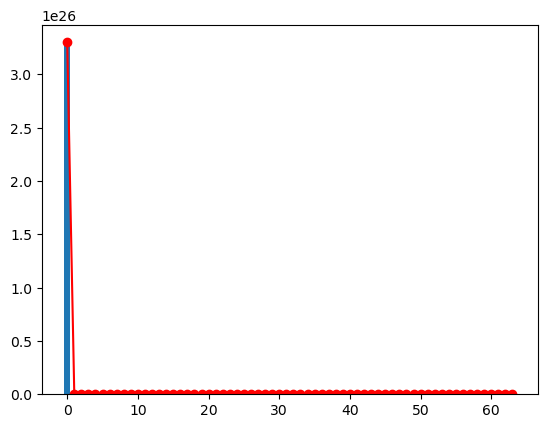

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming df_dropped is a Dask DataFrame, we'll compute it to work with sklearn PCA
df_dropped_computed = df_dropped.compute()  # Convert Dask DataFrame to Pandas

# Applying PCA
pca = PCA()
pca.fit(df_dropped_computed)
df_pca_all = pca.transform(df_dropped_computed)

# Extract eigenvalues
eigenvalues = pca.explained_variance_

# Plot eigenvalues
plt.bar(np.arange(0, df_dropped_computed.shape[1], 1), eigenvalues)
plt.plot(eigenvalues, "r")
plt.plot(eigenvalues, "ro")
plt.show()


In [11]:
eigenvalues

array([3.30152451e+26, 1.37497186e+17, 4.23825671e+16, 2.30648868e+13,
       2.43192716e+11, 3.32407434e+09, 1.15961583e+09, 1.00471747e+09,
       3.36832840e+07, 5.99692481e+06, 1.17967182e+06, 6.86849368e+05,
       1.75787403e+04, 1.54860074e+04, 7.13476567e+03, 3.51408481e+03,
       2.97314943e+03, 1.80975853e+03, 5.33481625e+02, 3.31926077e+02,
       8.04180621e+01, 4.29407534e+01, 1.32911183e+01, 5.78229570e+00,
       4.07055983e+00, 1.55872744e+00, 2.99290352e-01, 1.70789479e-01,
       1.39360687e-01, 8.29448761e-02, 6.65814637e-02, 6.26597981e-02,
       3.01965877e-02, 1.79825153e-02, 4.98848255e-03, 2.44257539e-03,
       5.82843013e-04, 1.17479059e-04, 5.88861617e-06, 6.03079152e-07,
       2.31043565e-07, 4.67287932e-09, 3.36345259e-13, 4.95636756e-17,
       8.60536954e-18, 2.27649994e-18, 3.17127067e-19, 2.77688615e-33,
       1.12984374e-35, 6.66190297e-52, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

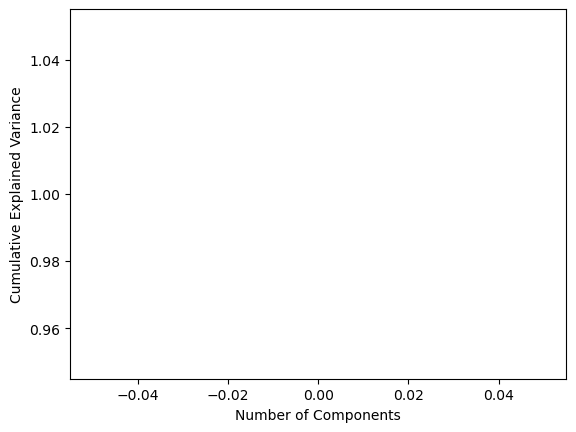

Number of components to retain for 90% variance explained: 1


In [23]:
# how many components to retain based on a threshold (e.g., 90% variance explained).
# Calculate the cumulative variance explained
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative variance
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Find the number of components to retain (e.g., for 90% variance explained)
n_components = np.argmax(cumulative_variance >= 0.80) + 1
print(f'Number of components to retain for 90% variance explained: {n_components}')

In [24]:
# Retain only the first `n_components` principal components
pca = PCA(n_components=n_components)
df_pca_reduced = pca.fit_transform(df_dropped_computed)

# Now you can use `df_pca_reduced` for further analysis or machine learning models


In [25]:
# Visualize Principal Components
plt.scatter(df_pca_reduced[:, 0], df_pca_reduced[:, 1], c=labels)  # Assuming you have labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.show()


IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
# Batch-wise PCA with Progress Bar

In [26]:
import dask.array as da
from sklearn.decomposition import IncrementalPCA
from tqdm import tqdm
import numpy as np
import pandas as pd

# Assuming df_dropped is your Dask DataFrame
# Compute Dask DataFrame into memory
df_dropped_computed = df_dropped.compute()

# Define batch size and PCA
batch_size = 10000  # Adjust batch size based on memory constraints
ipca = IncrementalPCA()

# Progress bar with tqdm
n_samples = df_dropped_computed.shape[0]
with tqdm(total=n_samples // batch_size) as pbar:
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        batch_data = df_dropped_computed[start:end]
        
        # Fit the PCA incrementally with each batch
        ipca.partial_fit(batch_data)
        
        # Update progress bar
        pbar.update(1)

# After fitting, transform the entire dataset
df_pca_all = ipca.transform(df_dropped_computed)

# Save the transformed dataset (PCA components)
df_pca_all_df = pd.DataFrame(df_pca_all)
df_pca_all_df.to_csv('pca_selected_features.csv', index=False)

# Save the selected components (eigenvalues) for future use
np.savetxt('pca_eigenvalues.txt', ipca.explained_variance_)

# Plot the explained variance
import matplotlib.pyplot as plt

eigenvalues = ipca.explained_variance_
plt.bar(np.arange(0, len(eigenvalues)), eigenvalues)
plt.plot(eigenvalues, "r")
plt.plot(eigenvalues, "ro")
plt.title("Explained Variance of PCA Components")
plt.xlabel("Principal Component Index")
plt.ylabel("Eigenvalue")
plt.show()


2024-09-16 12:24:30,838 - distributed.protocol.core - CRITICAL - Failed to deserialize
Traceback (most recent call last):
  File "C:\Users\Acer\miniconda3\Lib\site-packages\distributed\protocol\core.py", line 175, in loads
    return msgpack.loads(
           ^^^^^^^^^^^^^^
  File "C:\Users\Acer\miniconda3\Lib\site-packages\msgpack\fallback.py", line 125, in unpackb
    ret = unpacker._unpack()
          ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\miniconda3\Lib\site-packages\msgpack\fallback.py", line 590, in _unpack
    ret[key] = self._unpack(EX_CONSTRUCT)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\miniconda3\Lib\site-packages\msgpack\fallback.py", line 590, in _unpack
    ret[key] = self._unpack(EX_CONSTRUCT)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\miniconda3\Lib\site-packages\msgpack\fallback.py", line 592, in _unpack
    ret = self._object_hook(ret)
          ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\miniconda3\Lib\site-packages\distri

TypeError: Could not serialize object of type DataFrame
Traceback (most recent call last):
  File "C:\Users\Acer\miniconda3\Lib\site-packages\distributed\protocol\serialize.py", line 363, in serialize
    header, frames = dumps(x, context=context) if wants_context else dumps(x)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\miniconda3\Lib\site-packages\distributed\protocol\serialize.py", line 78, in pickle_dumps
    frames[0] = pickle.dumps(
                ^^^^^^^^^^^^^
  File "C:\Users\Acer\miniconda3\Lib\site-packages\distributed\protocol\pickle.py", line 81, in dumps
    result = cloudpickle.dumps(x, **dump_kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\miniconda3\Lib\site-packages\cloudpickle\cloudpickle.py", line 1479, in dumps
    cp.dump(obj)
  File "C:\Users\Acer\miniconda3\Lib\site-packages\cloudpickle\cloudpickle.py", line 1245, in dump
    return super().dump(obj)
           ^^^^^^^^^^^^^^^^^
MemoryError


In [ ]:
Source_IP_names = df['Source IP'].unique().compute()

print("Number of Source IP Names:", len(Source_IP_names))
print("Source IP Names:")
print(Source_IP_names)

In [ ]:
Destination_IP_names = df['Destination IP'].unique().compute()

print("Number of Destination IP Names:", len(Destination_IP_names))
print("Source IP Names:")
print(Destination_IP_names)

In [ ]:
unique_protocol_names = df['Protocol_name'].unique().compute()

print("Number of Unique Protocol Names:", len(unique_protocol_names))
print("Unique Protocol Names:")
print(unique_protocol_names)

In [ ]:
label_names = df['label'].unique().compute()

print("Number of label_names:", len(label_names))
print("label_names:")
print(label_names)

In [ ]:
subLabel_names = df['subLabel'].unique().compute() 

print("Number of subLabel_names:", len(subLabel_names))
print("subLabel_names:")
print(subLabel_names)

In [ ]:
subLabelCat_names = df['subLabelCat'].unique().compute()

print("Number of subLabelCat_names:", len(subLabelCat_names))
print("subLabelCat_names:")
print(subLabelCat_names)

In [ ]:
# Step 1: Convert the relevant columns to categorical type
df = df.categorize(columns=['Source IP', 'Destination IP', 'Protocol_name'])

# Step 2: Apply one-hot encoding using Dask's get_dummies
df_encoded = dd.get_dummies(df, columns=['Source IP', 'Destination IP', 'Protocol_name'])

# Step 3: Display the first few rows of the transformed DataFrame
print(df_encoded.head())

In [ ]:
# To display the first few rows of data
df_encoded.head()  # By default, it shows the first 5 rows

In [ ]:
# Save the filtered DataFrame to a CSV file
# df_encoded.to_csv('df_encoded/*.csv', index=False, single_file=True)  # Save as a single CSV file
df_encoded.to_csv('df_encoded.csv', index=False, single_file=True)

print("Encoded Columns saved as df_encoded.csv'.")

In [ ]:
mean_values = df_encoded.mean()  # Returns a series
print(mean_values)  

In [ ]:
df_encoded.head()

num_rows = df_encoded.shape[0]
num_cols = df_encoded.shape[1]

print("Number of rows in the sample:", num_rows)
print("Number of columns in the sample:", num_cols)

In [ ]:
df_encoded.describe()

In [ ]:
df_encoded = dd.read_csv(r'D:\df_encoded.csv', blocksize = '80MB')
df_encoded

In [ ]:
# Select a random sample or downsample the DataFrame
df_encoded_sampled = df_encoded.sample(frac=0.1, random_state=42)
df_encoded_sampled.to_csv('df_encoded_sampled.csv', index=False, single_file=True)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_encoded_sampled)
df_pca_all = pca.transform(df_encoded_sampled)
eigenvalues = pca.explained_variance_
plt.bar(np.arange(0,df_encoded_sampled.shape[1],1), eigenvalues)
plt.plot(eigenvalues, "r")
plt.plot(eigenvalues, "ro")
plt.show()